In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
from datetime import date, timedelta, datetime

In [2]:
may = pd.read_pickle('../data/may.pkl')
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [3]:
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5


In [4]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
# promise_zones= promise_zones.to_crs('EPSG:4326')
print(promise_zones)

epsg:2274
   OBJECTID  ZONE_ID    SHAPE_STAr     SHAPE_STLe  \
0         1        1  1.053728e+08   49364.601403   
1         2        2  7.670585e+07   45226.018917   
2         3        3  2.985488e+08   75207.067487   
3         4        4  2.713638e+08   74348.596054   
4         5        5  3.928178e+08  106661.712102   
5         6        6  9.535996e+07   59256.923574   

                                            geometry  
0  POLYGON ((1743366.812 678044.543, 1743367.698 ...  
1  POLYGON ((1738690.545 661791.347, 1738733.644 ...  
2  POLYGON ((1759602.544 668309.889, 1759640.155 ...  
3  POLYGON ((1747799.003 654974.612, 1747821.293 ...  
4  POLYGON ((1737013.744 692634.639, 1737122.605 ...  
5  POLYGON ((1716935.654 667534.495, 1716992.481 ...  


<AxesSubplot:>

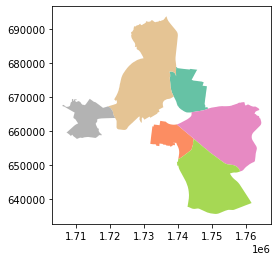

In [5]:
promise_zones.plot(cmap='Set2')

In [6]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [7]:
print(promise_zones.loc[0, 'geometry'])

POLYGON ((1743366.812291667 678044.5425000042, 1743367.697500005 678044.5356249958, 1743447.46541667 678056.6558333337, 1743491.095833331 678089.0802083313, 1743559.364166662 678140.2435416728, 1743611.48041667 678163.5006249994, 1743695.287708327 678201.801458329, 1743777.13729167 678216.0904166698, 1743798.416250005 678220.2931250036, 1743904.743125007 678194.710833326, 1743994.282291666 678173.2637500018, 1744019.93020834 678170.1518750042, 1744101.891249999 678160.7779166698, 1744158.493125007 678153.7852083296, 1744197.998333335 678149.1095833331, 1744293.813541666 678137.8081250042, 1744328.00729166 678133.1743749976, 1744338.916458338 678131.9975000024, 1744384.317291662 678126.5483333319, 1744405.834583327 678123.4689583331, 1744469.799374998 678114.5995833278, 1744491.02458334 678111.8866666704, 1744570.04354167 678103.6283333302, 1744590.093958333 678101.6527083367, 1744689.458749995 678091.4170833379, 1744787.646041662 678081.5554166734, 1744806.811458334 678079.5864583403, 

In [8]:
may['sumdid'].value_counts() 

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
Powered1PKP7               1
PoweredN4YI2A7RXZQLY       1
Powered3361332             1
Powered523737              1
PoweredCI6VKIK2KOFMC       1
Name: sumdid, Length: 8303, dtype: int64

In [9]:
promise_zones.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


<AxesSubplot:>

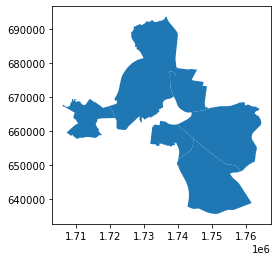

In [10]:
promise_zones.plot()

In [11]:
promise_zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


In [12]:
#make a list of datetimes with datetime function 
start = datetime(2019, 5, 1, 0, 0)
end = datetime(2019, 5, 1, 1, 0)
delta = timedelta(hours=1)
timelist = []
timenamelist = []
while start <= end:
    timelist.append(start)
    timenamelist.append(start.strftime("%Y-%m-%d-%H-%M"))
    start += delta
# print(timelist)
# print(timenamelist)

In [13]:
#goal of function: using list of time frames, in this case, days, make a dataframe containing
#info about the location for each scooter, for each day


#make dictionary of dataframes using base dataframe and a user-defined segments_of_time_list
#from cell above
def make_day_df(datetime_list, timenames_list, dataframe, colname):
    resultslist = {} #turn into dictionary
    x = 0
    y = 1
    z = 0
    while x in range(0,len(datetime_list)-1):
        starttime = datetime_list[x]
        endtime = datetime_list[y]
        mask = (dataframe[colname] > starttime) & (dataframe[colname] <= endtime)
        framename = dataframe.loc[mask]
        x += 1
        y += 1
        print(x)
        resultslist[timenames_list[z]] = framename
        z += 1
    return resultslist
        
the_output = make_day_df(timelist, timenamelist, may,"pubdatetime")

1


In [14]:
the_output.keys()

dict_keys(['2019-05-01-00-00'])

In [15]:
the_output['2019-05-01-00-00']
# the_output['2019-05-01-00-00']['sumdid'].nunique()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0
...,...,...,...,...,...,...
26124,2019-05-01 00:59:59.163,36.121562,-86.774363,PoweredKJTKOKALXNPZX,81.0,3
26125,2019-05-01 00:59:59.163,36.122702,-86.775087,PoweredCVH7LMHIIIIAF,77.0,3
26126,2019-05-01 00:59:59.163,36.124224,-86.773634,Powered5SZPJJWT56FG3,81.0,3
26127,2019-05-01 00:59:59.163,36.127435,-86.776972,PoweredIKAA5T3PT44MA,42.0,3


In [16]:
#adding geomtery column with lambda and point
the_output['2019-05-01-00-00']['geometry'] = the_output['2019-05-01-00-00'].apply(lambda x: Point(x['longitude'], 
                                                         x['latitude']), axis=1)
the_output['2019-05-01-00-00'].head(3)

/var/folders/0j/wl_2hyp13198px6zb01hnsxm0000gn/T/ipykernel_29544/1316813279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_output['2019-05-01-00-00']['geometry'] = the_output['2019-05-01-00-00'].apply(lambda x: Point(x['longitude'],


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,POINT (-86.799877 36.136822)
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,POINT (-86.77294499999999 36.191252)
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,POINT (-86.80629300000001 36.144752)


In [17]:
may['sumdid'].value_counts()

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
Powered1PKP7               1
PoweredN4YI2A7RXZQLY       1
Powered3361332             1
Powered523737              1
PoweredCI6VKIK2KOFMC       1
Name: sumdid, Length: 8303, dtype: int64

In [23]:
scoots_geo = gpd.GeoDataFrame(may, 
                           crs = promise_zones.crs, 
                           geometry = promise_zones['geometry'])

In [24]:
type(scoots_geo)

geopandas.geodataframe.GeoDataFrame

In [20]:
promise_zones.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


In [38]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [48]:
promise_zones.crs

<Projected CRS: EPSG:2274>
Name: NAD83 / Tennessee (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Tennessee
- bounds: (-90.31, 34.98, -81.65, 36.68)
Coordinate Operation:
- name: SPCS83 Tennessee zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [44]:
scoots_geo = gpd.sjoin(promise_zones,zipcodes, op='within')

/var/folders/0j/wl_2hyp13198px6zb01hnsxm0000gn/T/ipykernel_29544/1012710177.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2274
Right CRS: EPSG:4326

  scoots_geo = gpd.sjoin(promise_zones,zipcodes, op='within')


In [51]:
area_center = [36.163,-86.782]
print(area_center)

[36.163, -86.782]


In [56]:
scoots_geo = gpd.sjoin(may,promise_zones, op = 'within')

ValueError: 'left_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>